In [1]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers,initializers
from sklearn.model_selection import StratifiedKFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [2]:
dataset = "News Title.xls"

In [3]:
df = pd.read_excel(dataset)

In [4]:
df.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


In [5]:
df=df.rename({'News Title':'Title',
             'Category':'Class'},axis=1)

In [6]:
df.isna().sum()

No       0
Title    0
Class    0
dtype: int64

In [7]:
duplicate = df[df.duplicated()]
duplicate.head()

,No,Title,Class


In [8]:
df.groupby('Class').describe().T

Class         Business  Entertainment       Medical    Technology
No count  17707.000000   23961.000000   7091.000000  16776.000000
   mean   32796.910657   32653.612036  32728.125652  32917.718526
   std    18898.458855   18969.962512  18919.652461  18865.921511
   min        2.000000       3.000000     15.000000      1.000000
   25%    16434.500000   16146.000000  16322.500000  16723.500000
   50%    32767.000000   32621.000000  32794.000000  32973.000000
   75%    49333.000000   49144.000000  48965.000000  49113.000000
   max    65535.000000   65534.000000  65526.000000  65532.000000

In [9]:
# Get all the business, entertainment, medical, technology
business = df[df.Class == 'Business']
entertainment = df[df.Class == 'Entertainment']
medical  = df[df.Class == 'Medical']
technology = df[df.Class == 'Technology']

# Create numpy list to visualize using wordcloud
business_title = " ".join(business.Title.to_numpy().tolist())
entertainment_title = " ".join(entertainment.Title.to_numpy().tolist())
medical_title = " ".join(medical.Title.to_numpy().tolist())
technology_title = " ".join(technology.Title.to_numpy().tolist())

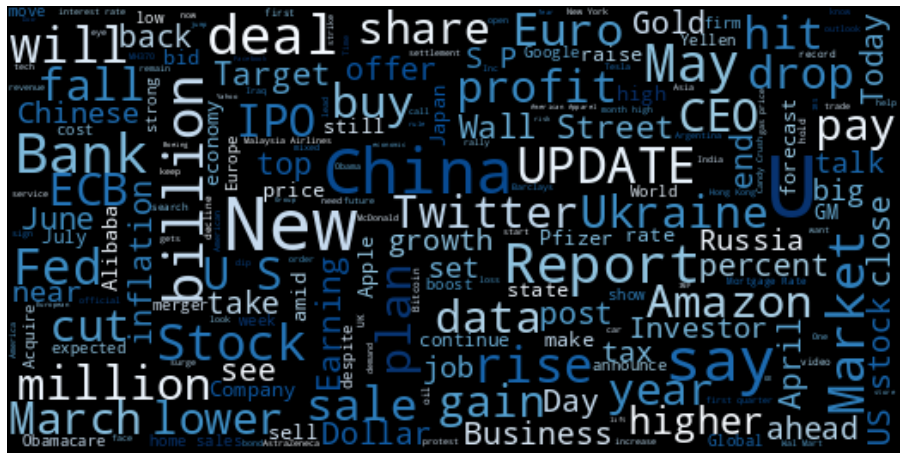

In [10]:
# wordcloud of Business Title
business_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(business_title)
plt.figure(figsize=(16,10))
plt.imshow(business_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

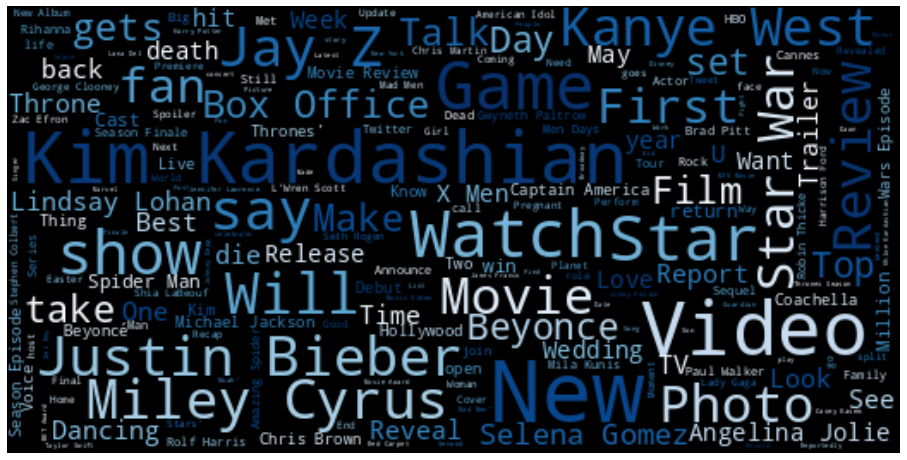

In [11]:
# wordcloud of Entertainment Title
entertainment_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(entertainment_title)
plt.figure(figsize=(16,10))
plt.imshow(entertainment_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

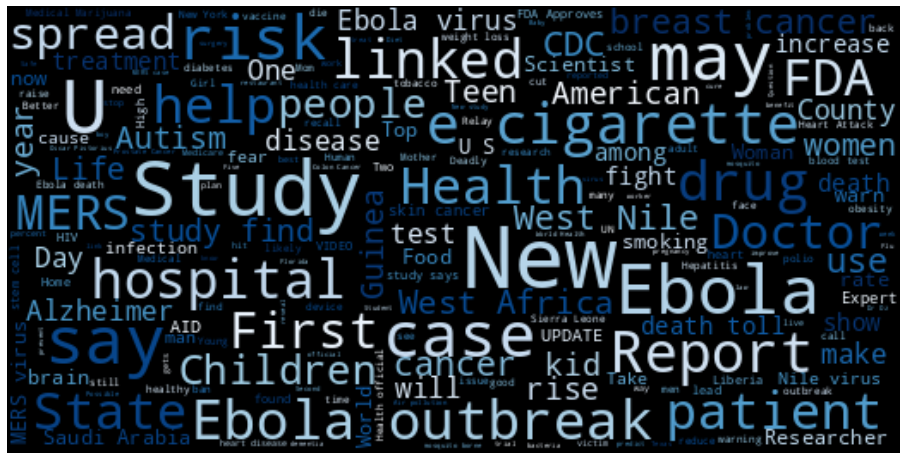

In [12]:
# wordcloud of Medical Title
medical_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(medical_title)
plt.figure(figsize=(16,10))
plt.imshow(medical_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

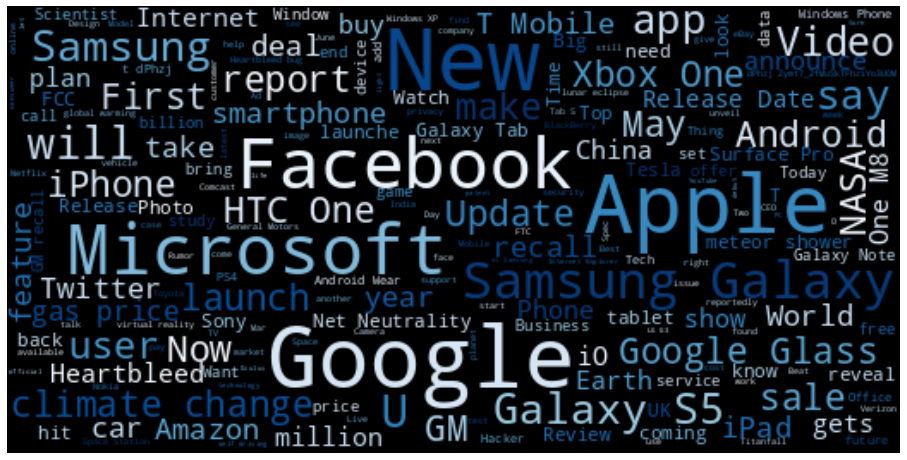

In [13]:
# wordcloud of Technology Title
technology_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, 
                           background_color ="black", colormap='Blues').generate(technology_title)
plt.figure(figsize=(16,10))
plt.imshow(technology_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

/Users/alvin/Documents/DUATIGA/Bagi Data/Upload ke Github dan Kaggle2/nlpnews/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

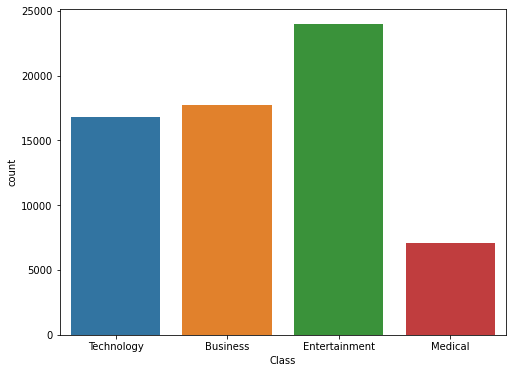

In [14]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df.Class)

In [15]:
df['Max_Len'] = [len(s.split()) for s in df['Title']]
df

,No,Title,Class,Max_Len
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology,9
1,2,Dov Charney's Redeeming Quality,Business,4
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment,10
3,4,"Google shows off Androids for wearables, cars,...",Technology,8
4,5,China May new bank loans at 870.8 bln yuan,Business,9
...,...,...,...,...
65530,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology,13
65531,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology,7
65532,65533,Watch first 'Ninja Turtles' trailer,Entertainment,5
65533,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment,10


In [16]:
df['Max_Len'].describe()

count    65535.000000
mean         9.273228
std         10.413636
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max       1837.000000
Name: Max_Len, dtype: float64

In [17]:
# Map ham label as 0 and spam as 1
df['Class_type']= df['Class'].map({'Business': 0, 'Technology': 1,'Entertainment':2,'Medical':3})
X = df['Title'].values
y = df['Class_type'].values

In [18]:
# Split data into train, val and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

/Users/alvin/Documents/DUATIGA/Bagi Data/Upload ke Github dan Kaggle2/nlpnews/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

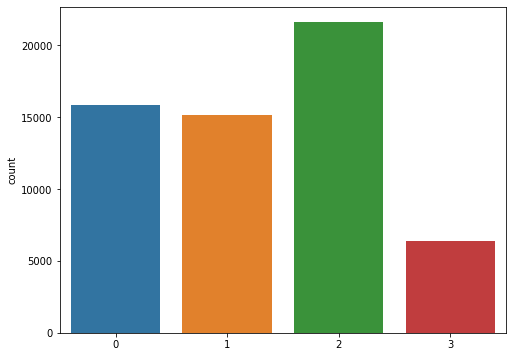

In [19]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(y_train)

/Users/alvin/Documents/DUATIGA/Bagi Data/Upload ke Github dan Kaggle2/nlpnews/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

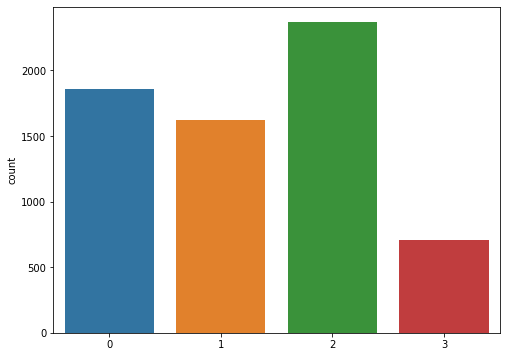

In [20]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(y_test)

In [21]:
# Defining hyperparameters
max_len = 20
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 33830
embedding_dim = 16
drop_value = 0.2 

In [22]:
tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [23]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'in': 3,
 'the': 4,
 'of': 5,
 'for': 6,
 'on': 7,
 'and': 8,
 'a': 9,
 'with': 10,
 'new': 11,
 'at': 12,
 'is': 13,
 'us': 14,
 'as': 15,
 'from': 16,
 'after': 17,
 'up': 18,
 'by': 19,
 'google': 20,
 'be': 21,
 'video': 22,
 'says': 23,
 '2014': 24,
 'apple': 25,
 'over': 26,
 'will': 27,
 '2': 28,
 'first': 29,
 'more': 30,
 'may': 31,
 '1': 32,
 'samsung': 33,
 'about': 34,
 'one': 35,
 '4': 36,
 '3': 37,
 'not': 38,
 'you': 39,
 'out': 40,
 'report': 41,
 'it': 42,
 '5': 43,
 'watch': 44,
 'are': 45,
 'galaxy': 46,
 'facebook': 47,
 'this': 48,
 'kim': 49,
 'microsoft': 50,
 'season': 51,
 'review': 52,
 'day': 53,
 'but': 54,
 'your': 55,
 'deal': 56,
 'kardashian': 57,
 'million': 58,
 'china': 59,
 "'the": 60,
 'star': 61,
 'has': 62,
 'its': 63,
 'news': 64,
 'could': 65,
 'sales': 66,
 'off': 67,
 'update': 68,
 'year': 69,
 'her': 70,
 'how': 71,
 '7': 72,
 'study': 73,
 'what': 74,
 'tv': 75,
 'time': 76,
 'movie': 77,
 '6': 78,
 'amazon': 79,
 's

In [24]:
# check how many words and max_len
print('Max_len: %s' % max([len(s.split()) for s in x_train]))

tot_words = len(word_index)
print('There are %s unique tokens in data. ' % tot_words)

Max_len: 1837
There are 33829 unique tokens in data. 


In [25]:
# Sequencing and padding on training and testing 
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)

In [26]:
print('Shape of train tensor: ', train_padded.shape)
print('Shape of test tensor: ', test_padded.shape)

Shape of train tensor:  (58981, 20)
Shape of test tensor:  (6554, 20)


In [27]:
# Before padding
print(len(train_sequences[0]), len(train_sequences[1]))
print(len(test_sequences[0]), len(test_sequences[1]))

13 13
9 13


In [28]:
# After padding
print(len(train_padded[0]), len(train_padded[1]))
print(len(test_padded[0]), len(test_padded[1]))

20 20
20 20


In [29]:
print(train_padded)

[[ 953 1015   62 ...    0    0    0]
 [2007  166  376 ...    0    0    0]
 [3865 1439  412 ...    0    0    0]
 ...
 [1242    2  192 ...    0    0    0]
 [5107 2192 3423 ...    0    0    0]
 [ 683 1100 4589 ...    0    0    0]]


In [30]:
print(test_padded)

[[  454   231     4 ...     0     0     0]
 [12678    11   306 ...     0     0     0]
 [ 1844  1465    10 ...     0     0     0]
 ...
 [  103   614     6 ...     0     0     0]
 [ 6261  2991   120 ...     0     0     0]
 [  669    27 11942 ...     0     0     0]]


In [31]:
#Dense model architecture
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(32,activation='relu'))
# model.add(layers.Dropout(drop_value))
model.add(layers.Dense(4,activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            541280    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 541,956
Trainable params: 541,956
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mse',optimizer='adam' ,metrics=['accuracy'])

In [34]:
# fitting a dense spam detector model

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# splitting data into different folds
for train_index, val_index in kf.split(train_padded, y_train):
    x_train_kf, x_val_kf = train_padded[train_index], train_padded[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
    y_train_categorical = tf.keras.utils.to_categorical(y_train_kf, 4)
    y_val_categorical = tf.keras.utils.to_categorical(y_val_kf, 4)
    
    history = model.fit(x_train_kf, 
                    y_train_categorical, 
                    epochs=num_epochs,
                    validation_data=(x_val_kf,y_val_categorical),
                    callbacks =[early_stop])

Epoch 1/30


2021-07-30 11:47:17.169675: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


1475/1475 [==============================] - 12s 8ms/step - loss: 0.0921 - accuracy: 0.7304 - val_loss: 0.0391 - val_accuracy: 0.9045
Epoch 2/30
1475/1475 [==============================] - 10s 7ms/step - loss: 0.0264 - accuracy: 0.9361 - val_loss: 0.0304 - val_accuracy: 0.9205
Epoch 3/30
1475/1475 [==============================] - 11s 8ms/step - loss: 0.0159 - accuracy: 0.9617 - val_loss: 0.0289 - val_accuracy: 0.9224
Epoch 4/30
1475/1475 [==============================] - 10s 7ms/step - loss: 0.0111 - accuracy: 0.9742 - val_loss: 0.0292 - val_accuracy: 0.9228
Epoch 5/30
1475/1475 [==============================] - 10s 6ms/step - loss: 0.0083 - accuracy: 0.9816 - val_loss: 0.0303 - val_accuracy: 0.9209
Epoch 1/30
1475/1475 [==============================] - 13s 9ms/step - loss: 0.0128 - accuracy: 0.9685 - val_loss: 0.0082 - val_accuracy: 0.9804
Epoch 2/30
1475/1475 [==============================] - 12s 8ms/step - loss: 0.0090 - accuracy: 0.9790 - val_loss: 0.0084 - val_accuracy: 0.9

In [35]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

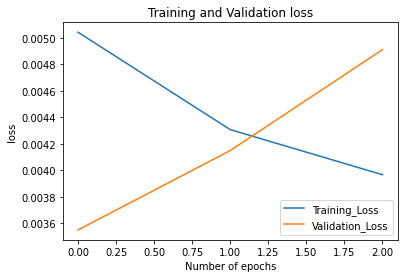

In [36]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

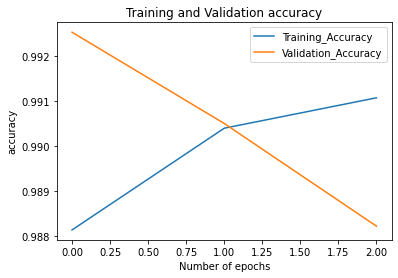

In [37]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [38]:
y_test_categorical = tf.keras.utils.to_categorical(y_test, 4)
pred = np.argmax(model.predict(test_padded), axis=-1)
acc = model.evaluate(test_padded, y_test_categorical)
proba_nn = model.predict(test_padded)

print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

205/205 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9103
Test loss is 0.04 accuracy is 0.91  
[[1627  107   42   42]
 [ 140 1469   47   25]
 [  42   34 2260   31]
 [  46   14   18  610]]


<AxesSubplot:>

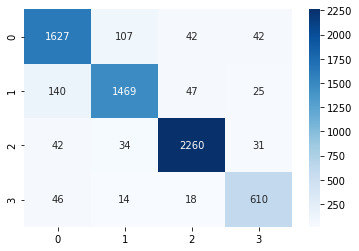

In [39]:
cf_matrix = confusion_matrix(pred, y_test)

sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

In [40]:
# Save the model as a file
model_filename = 'nlp_news_title_classification.h5'
models.save_model(model, model_filename)